In [79]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
# 정규식
import re

In [80]:
# 광주 16 ~ 22년 데이터 로드
gj_elec_df = pd.read_excel('광주광역시_전력판매량_16~22.xlsx', engine='openpyxl')
gj_elec_df

,연도,시도,시군구,계약종별,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2016,광주광역시,동구,주택용,11811823,12091956,10803000,10806127,9945718,10085118,10717434,13578474,11797022,10030092,10639115,11093412
1,2016,광주광역시,동구,일반용,34215184,35017786,30996152,28077765,26270017,29246349,33255320,38566172,33920485,27567331,25781465,31459960
2,2016,광주광역시,동구,교육용,3759564,3826297,3467243,3480401,2681403,3076275,3448469,3767835,3757630,2982300,3007270,3789519
3,2016,광주광역시,동구,산업용,2776636,2750732,2476386,2337747,2150620,2229072,2499186,2657209,2484688,2177228,2232490,2611945
4,2016,광주광역시,동구,농사용,94134,98113,85146,78186,64319,62055,62080,86629,109730,77753,95335,99870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2022,광주광역시,남구,산업용,3845966,3667295,3540659,3662662,3510075,3617016,3902396,4011986,3822018,3487924,3816608,4131545
276,2022,광주광역시,남구,농사용,1291574,1218056,1016295,776865,681624,832092,737684,855388,785521,639628,1371182,871011
277,2022,광주광역시,남구,가로등,1162161,1072994,987559,976265,922682,878706,869580,909639,961242,1021102,1054782,1095604
278,2022,광주광역시,남구,심 야,2287030,2280806,1858417,1018792,436186,298735,236946,218773,231524,357315,932477,1752990


In [81]:
# 데이터 확인
gj_elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      280 non-null    int64 
 1   시도      280 non-null    object
 2   시군구     280 non-null    object
 3   계약종별    280 non-null    object
 4   1월      280 non-null    int64 
 5   2월      280 non-null    int64 
 6   3월      280 non-null    int64 
 7   4월      280 non-null    int64 
 8   5월      280 non-null    int64 
 9   6월      280 non-null    int64 
 10  7월      280 non-null    int64 
 11  8월      280 non-null    int64 
 12  9월      280 non-null    int64 
 13  10월     280 non-null    int64 
 14  11월     280 non-null    int64 
 15  12월     280 non-null    int64 
dtypes: int64(13), object(3)
memory usage: 35.1+ KB


In [82]:
gj_elec_df.head(8)

,연도,시도,시군구,계약종별,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2016,광주광역시,동구,주택용,11811823,12091956,10803000,10806127,9945718,10085118,10717434,13578474,11797022,10030092,10639115,11093412
1,2016,광주광역시,동구,일반용,34215184,35017786,30996152,28077765,26270017,29246349,33255320,38566172,33920485,27567331,25781465,31459960
2,2016,광주광역시,동구,교육용,3759564,3826297,3467243,3480401,2681403,3076275,3448469,3767835,3757630,2982300,3007270,3789519
3,2016,광주광역시,동구,산업용,2776636,2750732,2476386,2337747,2150620,2229072,2499186,2657209,2484688,2177228,2232490,2611945
4,2016,광주광역시,동구,농사용,94134,98113,85146,78186,64319,62055,62080,86629,109730,77753,95335,99870
5,2016,광주광역시,동구,가로등,816692,766940,729447,679534,625743,595345,595425,617871,658563,703807,757152,782535
6,2016,광주광역시,동구,심 야,2593204,2832587,2277586,1699786,1058383,860584,913937,966987,691930,635077,1152659,1869778
7,2016,광주광역시,동구,합 계,56067237,57384411,50834960,47159546,42796203,46154798,51491851,60241177,53420048,44173588,43665486,51707019


In [83]:
# df 의 column 각 월로 되어있는것을 column 월별로 적용
gj_elec_df = pd.melt(gj_elec_df, id_vars = ['연도', '시도', '시군구', '계약종별'], var_name='month', value_name='kw')

In [84]:
# month로 만든 각월 칼럼 내용물을 계산하기 쉽도록 int형 데이터 정제
gj_elec_df['month'] = gj_elec_df['month'].apply(
    lambda x: int(re.findall('\d+',x.replace('월', ''))[0]) if pd.notnull(x) else x)

In [85]:
# 필요없는 칼럼 삭제
gj_elec_df.drop(columns='시도', inplace=True)

In [86]:
# 한글 칼럼명 사용시 혹시 모를 오류를 막기 위해 칼럼명 수정
gj_elec_df = gj_elec_df.rename(columns = {'연도' : 'year', '시군구' : 'area', '계약종별' : 'type'})
gj_elec_df

,year,area,type,month,kw
0,2016,동구,주택용,1,11811823
1,2016,동구,일반용,1,34215184
2,2016,동구,교육용,1,3759564
3,2016,동구,산업용,1,2776636
4,2016,동구,농사용,1,94134
...,...,...,...,...,...
3355,2022,남구,산업용,12,4131545
3356,2022,남구,농사용,12,871011
3357,2022,남구,가로등,12,1095604
3358,2022,남구,심 야,12,1752990


In [87]:
gj_elec_df_1 = gj_elec_df.groupby(['year', 'month', 'type'])['kw'].sum()

In [88]:
gj_elec_df_1.head(10)

year  month  type
2016  1      가로등       7842078
             교육용      27092538
             농사용       9785066
             산업용     261196271
             심 야      18357075
             일반용     255851378
             주택용     173309722
             합 계     753434128
      2      가로등       7435531
             교육용      26412246
Name: kw, dtype: int64

In [89]:
gj_elec_df_1 = gj_elec_df_1.to_frame().reset_index()

In [90]:
gj_elec_df_1.head(10)

,year,month,type,kw
0,2016,1,가로등,7842078
1,2016,1,교육용,27092538
2,2016,1,농사용,9785066
3,2016,1,산업용,261196271
4,2016,1,심 야,18357075
5,2016,1,일반용,255851378
6,2016,1,주택용,173309722
7,2016,1,합 계,753434128
8,2016,2,가로등,7435531
9,2016,2,교육용,26412246


In [91]:
gj_elec_df_1 = gj_elec_df_1.drop(gj_elec_df_1[gj_elec_df_1['type'] == '합 계'].index)

In [92]:
gj_elec_df_1.head(10)

,year,month,type,kw
0,2016,1,가로등,7842078
1,2016,1,교육용,27092538
2,2016,1,농사용,9785066
3,2016,1,산업용,261196271
4,2016,1,심 야,18357075
5,2016,1,일반용,255851378
6,2016,1,주택용,173309722
8,2016,2,가로등,7435531
9,2016,2,교육용,26412246
10,2016,2,농사용,11083161


In [121]:
# gj_elec_df_1.to_csv('kw_type.csv', index=False)

In [103]:
df = pd.read_csv('weather_kw_type.csv')

In [106]:
df

,Unnamed: 0,year,month,type,kw
0,0,2016,1,가로등,7842078
1,1,2016,1,교육용,27092538
2,2,2016,1,농사용,9785066
3,3,2016,1,산업용,261196271
4,4,2016,1,심 야,18357075
...,...,...,...,...,...
583,666,2022,12,농사용,8624110
584,667,2022,12,산업용,256259483
585,668,2022,12,심 야,8466299
586,669,2022,12,일반용,251968761


In [107]:
df.drop(columns='Unnamed: 0', inplace=True)

In [108]:
df

,year,month,type,kw
0,2016,1,가로등,7842078
1,2016,1,교육용,27092538
2,2016,1,농사용,9785066
3,2016,1,산업용,261196271
4,2016,1,심 야,18357075
...,...,...,...,...
583,2022,12,농사용,8624110
584,2022,12,산업용,256259483
585,2022,12,심 야,8466299
586,2022,12,일반용,251968761


In [109]:
weather_df = pd.read_csv('weather_df.csv')

In [112]:
weather_df.drop(columns='Unnamed: 0', inplace=True)

In [113]:
weather_df

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow
0,2016,1,0.9,69,49.7,6.0,244.83,13.5
1,2016,2,3.3,60,45.2,4.5,348.22,5.6
2,2016,3,8.4,60,55.2,4.1,520.95,0.0
3,2016,4,15.5,66,185.0,5.8,541.64,0.0
4,2016,5,19.8,65,104.5,5.2,681.60,0.0
...,...,...,...,...,...,...,...,...
79,2022,8,26.9,90,106.4,7.3,454.30,0.0
80,2022,9,23.1,77,89.2,6.2,483.16,0.0
81,2022,10,16.0,65,38.3,4.0,459.57,0.0
82,2022,11,11.8,62,46.7,3.9,336.75,0.0


In [114]:
kw_df = pd.merge(weather_df, df, how='left', on=['year', 'month'])
kw_df

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow,type,kw
0,2016,1,0.9,69,49.7,6.0,244.83,13.5,가로등,7842078
1,2016,1,0.9,69,49.7,6.0,244.83,13.5,교육용,27092538
2,2016,1,0.9,69,49.7,6.0,244.83,13.5,농사용,9785066
3,2016,1,0.9,69,49.7,6.0,244.83,13.5,산업용,261196271
4,2016,1,0.9,69,49.7,6.0,244.83,13.5,심 야,18357075
...,...,...,...,...,...,...,...,...,...,...
583,2022,12,1.1,63,30.6,5.0,275.78,32.9,농사용,8624110
584,2022,12,1.1,63,30.6,5.0,275.78,32.9,산업용,256259483
585,2022,12,1.1,63,30.6,5.0,275.78,32.9,심 야,8466299
586,2022,12,1.1,63,30.6,5.0,275.78,32.9,일반용,251968761


In [117]:
weather_kw_df = kw_df[['year','month','type','temp','Humidity_mean','rainfall_total','cloud','solar','snow','kw']]

In [118]:
weather_kw_df

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,kw
0,2016,1,가로등,0.9,69,49.7,6.0,244.83,13.5,7842078
1,2016,1,교육용,0.9,69,49.7,6.0,244.83,13.5,27092538
2,2016,1,농사용,0.9,69,49.7,6.0,244.83,13.5,9785066
3,2016,1,산업용,0.9,69,49.7,6.0,244.83,13.5,261196271
4,2016,1,심 야,0.9,69,49.7,6.0,244.83,13.5,18357075
...,...,...,...,...,...,...,...,...,...,...
583,2022,12,농사용,1.1,63,30.6,5.0,275.78,32.9,8624110
584,2022,12,산업용,1.1,63,30.6,5.0,275.78,32.9,256259483
585,2022,12,심 야,1.1,63,30.6,5.0,275.78,32.9,8466299
586,2022,12,일반용,1.1,63,30.6,5.0,275.78,32.9,251968761


In [119]:
# weather_kw_df.to_csv('weather_kw_df.csv', index=False)

In [120]:
df = pd.read_csv('weather_kw_df.csv')
df

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,kw
0,2016,1,가로등,0.9,69,49.7,6.0,244.83,13.5,7842078
1,2016,1,교육용,0.9,69,49.7,6.0,244.83,13.5,27092538
2,2016,1,농사용,0.9,69,49.7,6.0,244.83,13.5,9785066
3,2016,1,산업용,0.9,69,49.7,6.0,244.83,13.5,261196271
4,2016,1,심 야,0.9,69,49.7,6.0,244.83,13.5,18357075
...,...,...,...,...,...,...,...,...,...,...
583,2022,12,농사용,1.1,63,30.6,5.0,275.78,32.9,8624110
584,2022,12,산업용,1.1,63,30.6,5.0,275.78,32.9,256259483
585,2022,12,심 야,1.1,63,30.6,5.0,275.78,32.9,8466299
586,2022,12,일반용,1.1,63,30.6,5.0,275.78,32.9,251968761


In [125]:
df.head(10)

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,kw
0,2016,1,가로등,0.9,69,49.7,6.0,244.83,13.5,7842078
1,2016,1,교육용,0.9,69,49.7,6.0,244.83,13.5,27092538
2,2016,1,농사용,0.9,69,49.7,6.0,244.83,13.5,9785066
3,2016,1,산업용,0.9,69,49.7,6.0,244.83,13.5,261196271
4,2016,1,심 야,0.9,69,49.7,6.0,244.83,13.5,18357075
5,2016,1,일반용,0.9,69,49.7,6.0,244.83,13.5,255851378
6,2016,1,주택용,0.9,69,49.7,6.0,244.83,13.5,173309722
7,2016,2,가로등,3.3,60,45.2,4.5,348.22,5.6,7435531
8,2016,2,교육용,3.3,60,45.2,4.5,348.22,5.6,26412246
9,2016,2,농사용,3.3,60,45.2,4.5,348.22,5.6,11083161


In [126]:
def type_change(type):
    if type == "일반용":
        return 1
    elif type == '주택용':
        return 2
    elif type == '가로등':
        return 3
    elif type == '교육용':
        return 4
    elif type == '농사용':
        return 5
    elif type == '산업용':
        return 6
    elif type == '심 야':
        return 7   

In [127]:
df['type'] = df['type'].apply(lambda x: type_change(x))

In [132]:
df.sort_values(by=['year', 'month', 'type'], inplace=True)

In [133]:
df

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,kw
5,2016,1,1,0.9,69,49.7,6.0,244.83,13.5,255851378
6,2016,1,2,0.9,69,49.7,6.0,244.83,13.5,173309722
0,2016,1,3,0.9,69,49.7,6.0,244.83,13.5,7842078
1,2016,1,4,0.9,69,49.7,6.0,244.83,13.5,27092538
2,2016,1,5,0.9,69,49.7,6.0,244.83,13.5,9785066
...,...,...,...,...,...,...,...,...,...,...
581,2022,12,3,1.1,63,30.6,5.0,275.78,32.9,7316937
582,2022,12,4,1.1,63,30.6,5.0,275.78,32.9,31159967
583,2022,12,5,1.1,63,30.6,5.0,275.78,32.9,8624110
584,2022,12,6,1.1,63,30.6,5.0,275.78,32.9,256259483


In [143]:
type1_df = df.query("type == 1")
type2_df = df.query("type == 2")
type3_df = df.query("type == 3")
type4_df = df.query("type == 4")
type5_df = df.query("type == 5")
type6_df = df.query("type == 6")
type7_df = df.query("type == 7")
# type1_df
# type2_df
# type3_df
# type4_df
# type5_df
# type6_df
# type7_df

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,kw
0,2016,1,3,0.9,69,49.7,6.0,244.83,13.5,7842078
7,2016,2,3,3.3,60,45.2,4.5,348.22,5.6,7435531
14,2016,3,3,8.4,60,55.2,4.1,520.95,0.0,6731757
21,2016,4,3,15.5,66,185.0,5.8,541.64,0.0,6503431
28,2016,5,3,19.8,65,104.5,5.2,681.60,0.0,5843072
...,...,...,...,...,...,...,...,...,...,...
553,2022,8,3,26.9,90,106.4,7.3,454.30,0.0,5711285
560,2022,9,3,23.1,77,89.2,6.2,483.16,0.0,6117580
567,2022,10,3,16.0,65,38.3,4.0,459.57,0.0,6558372
574,2022,11,3,11.8,62,46.7,3.9,336.75,0.0,7080851


In [145]:
type_dic = [type1_df, type2_df, type3_df, type4_df, type5_df, type6_df, type7_df]

In [ ]:
typename = {1:'일반용', 2:'주택용', 3:'가로등', 4:'교육용', 5:'농사용', 6:'산업용', 7:'심 야'}

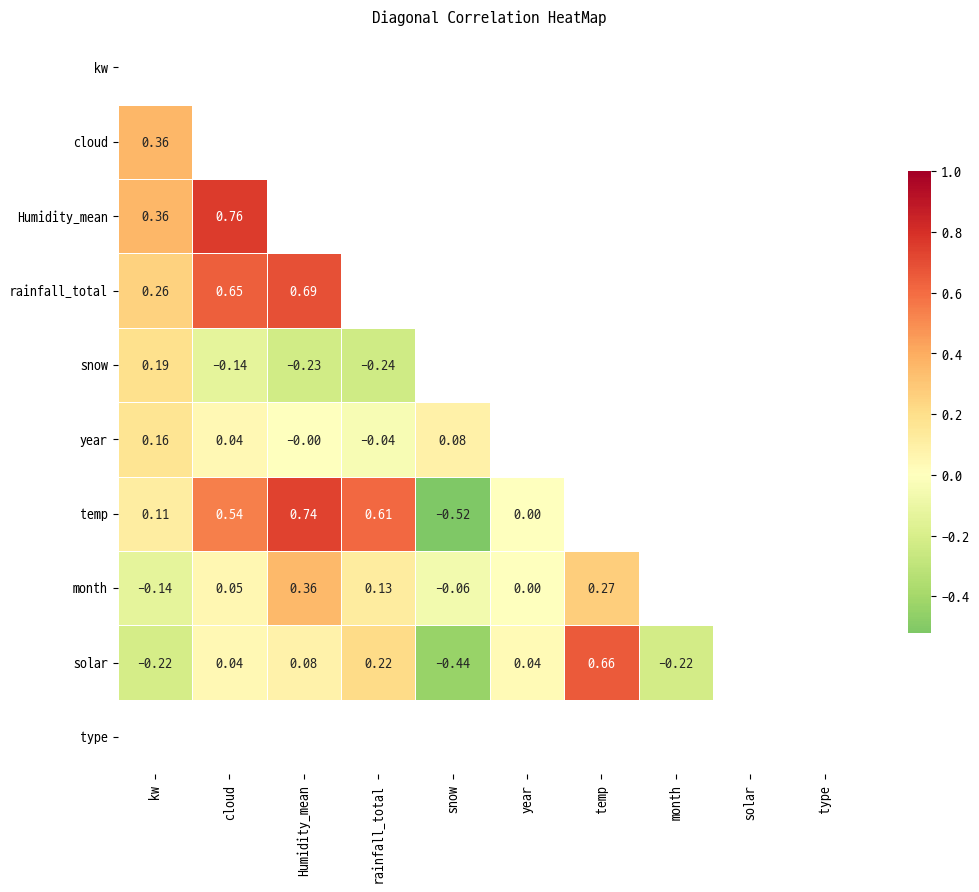

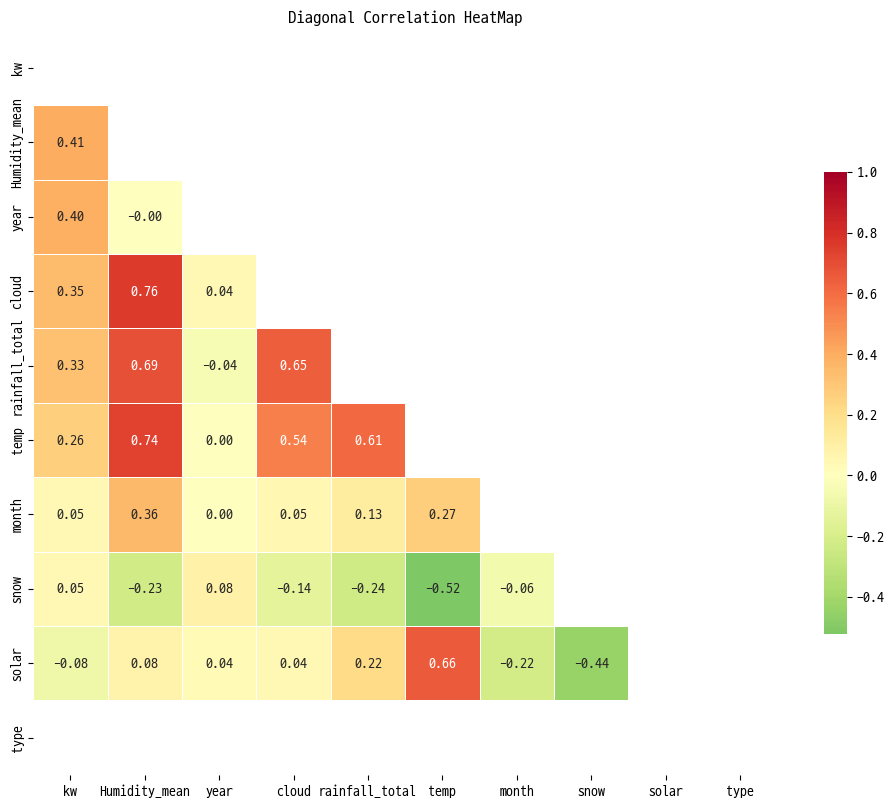

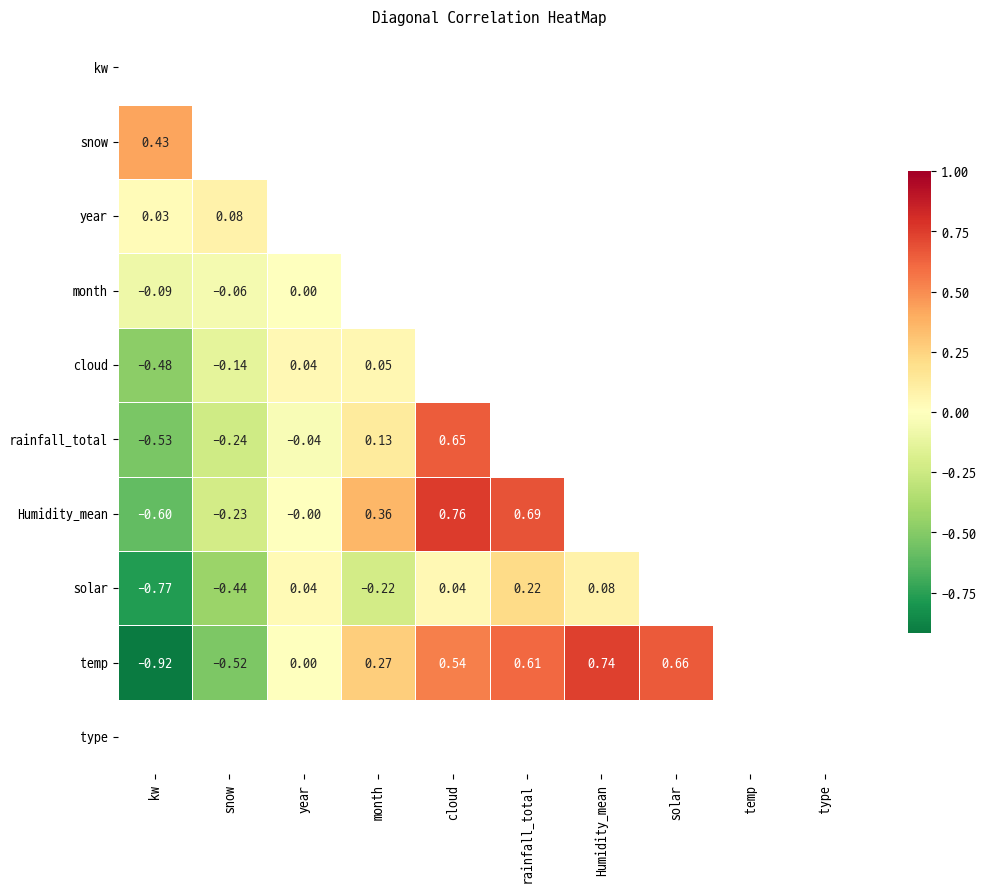

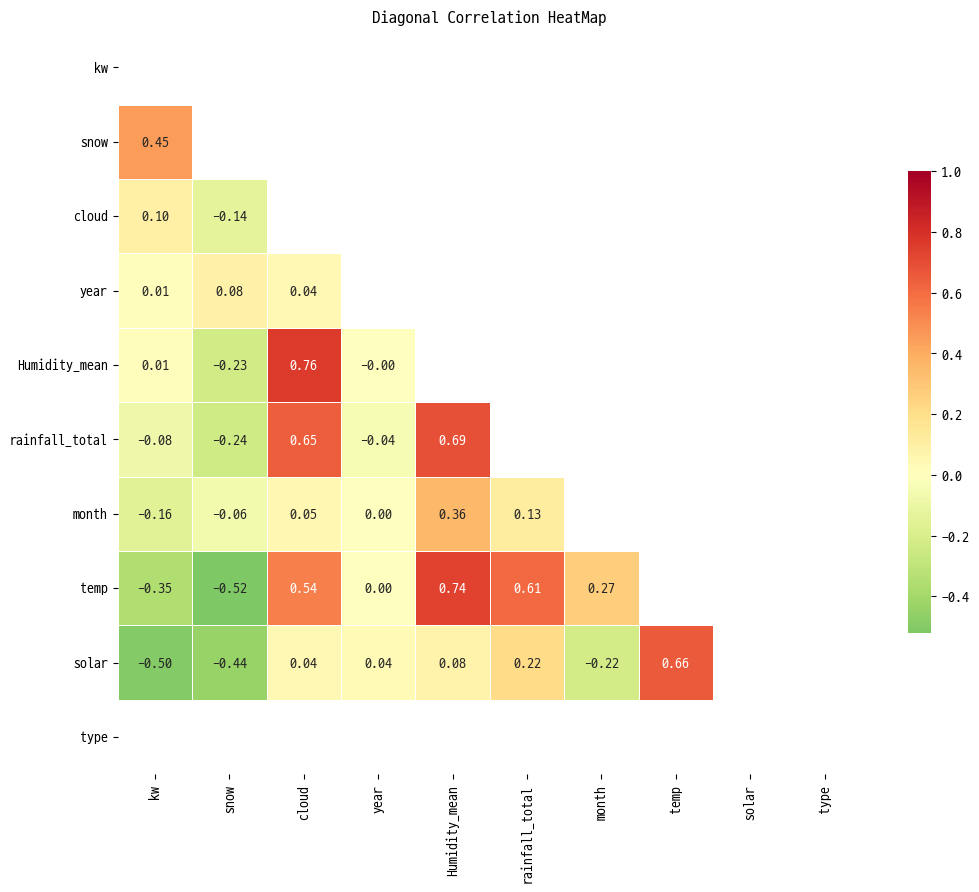

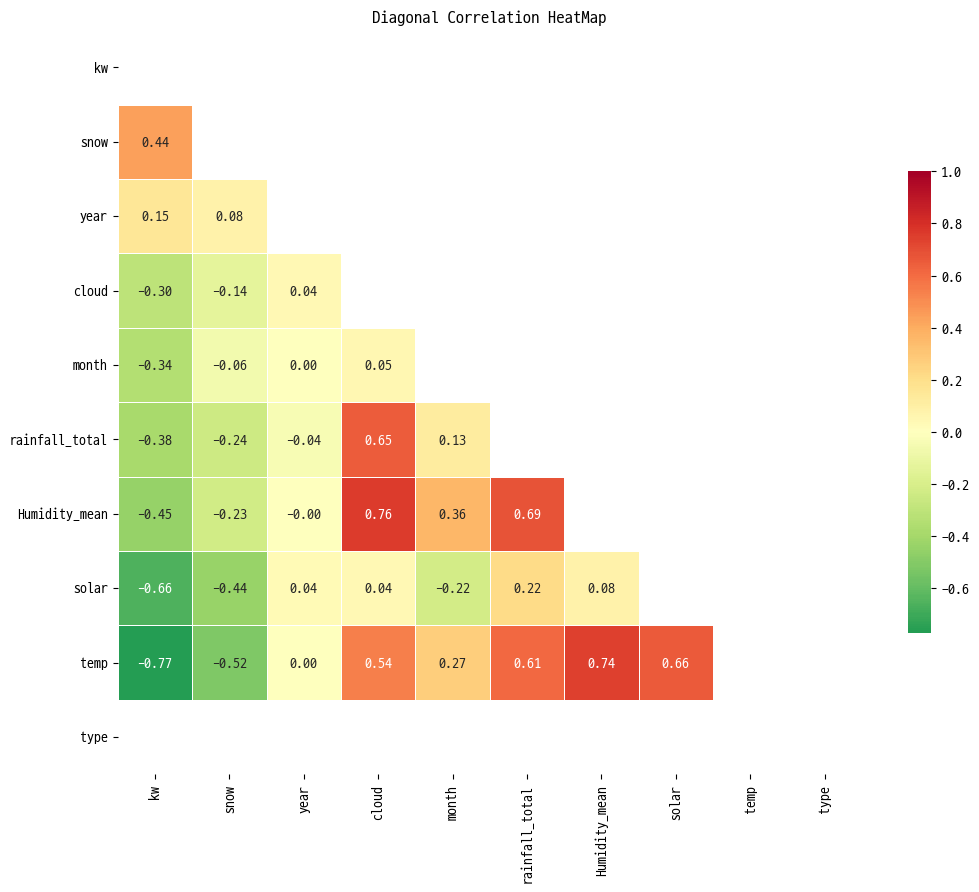

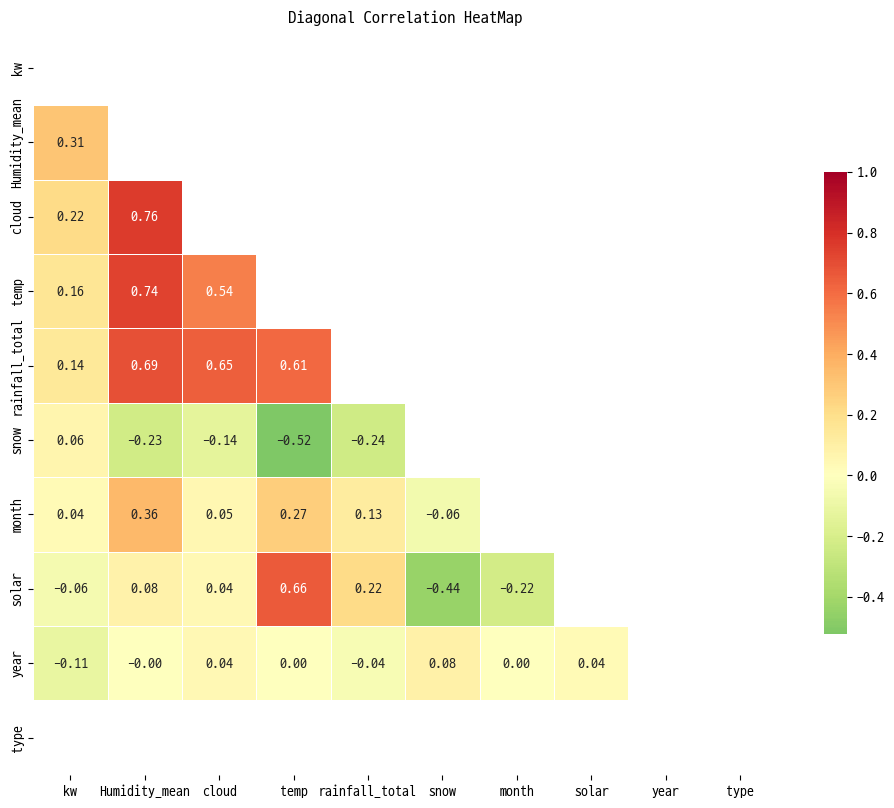

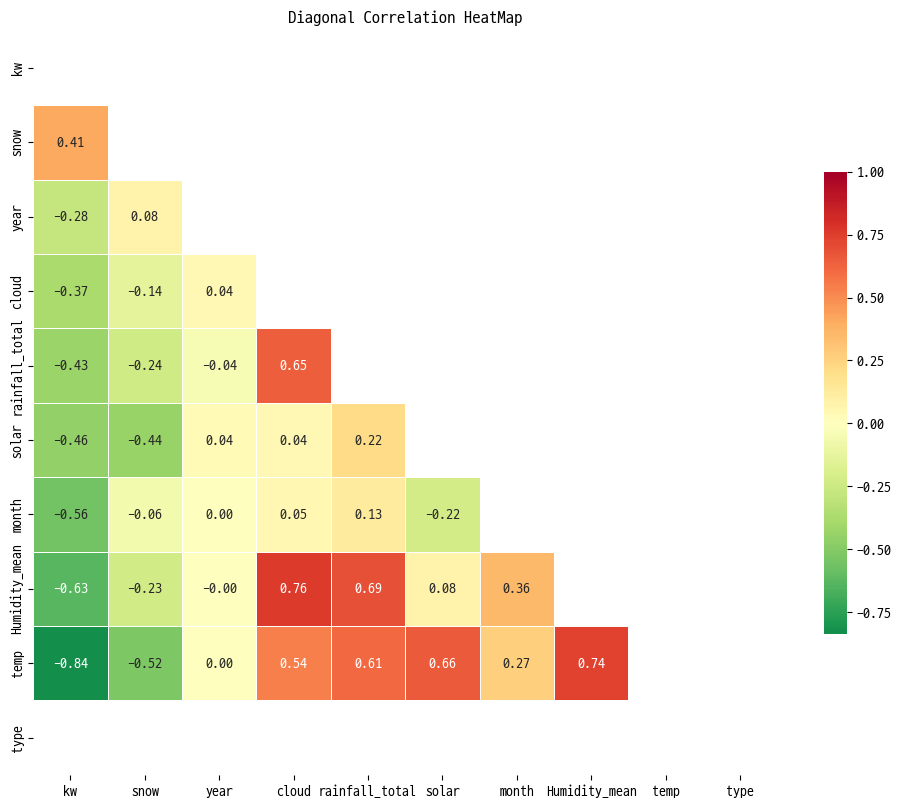

In [146]:
for i, item in enumerate(type_dic):
    num = i + 1
    
    kw_matrix = item.corr()
    kw_matrix = kw_matrix.sort_values(by = 'kw', axis = 0, ascending=False)
    kw_matrix = kw_matrix[kw_matrix.index]
    kw_matrix
    # 상관관계의 시각적 표현
    f, ax = plt.subplots(figsize=(12, 12))
    corr = kw_matrix.select_dtypes(exclude=["object","bool"]).corr()

    # 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
    mask = np.zeros_like(kw_matrix, dtype='bool')
    mask[np.triu_indices_from(mask)] = True

    g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
    center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title("날씨와 전력 상관관계")